In [228]:
# Probability Amplitude Swapping Implementation
# Date Dec 13, 2023
# Code Author Tom Mai

In [229]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Statevector

In [230]:
# Count number of bits of a number
def numBits(num):
    count = 0
    while num:
        count += 1
        num >>= 1
    return count

In [231]:
# Find the maximum lenght of bitstring
def maxNumBits(x, y):
    return max(numBits(x), numBits(y))

In [232]:
# Find the first different bit between x and y (x != y)
def diffIndx(x, y) :
    # find max bits
    maxBitCount = maxNumBits(x, y)
    
    #find first left most different bit
    for i in range(maxBitCount-1, -1, -1):
        if (x & (1 << i)) ^ (y & (1 << i)) != 0:
            return maxBitCount - i - 1


In [233]:
# Check if there is jth bit from the right most of bitstring
def getBit(num, i):
    return num & (1<<i)

In [234]:
# Flip the ith bit from the right most of bitstring
def flipBit(num,j):
    return num ^ (1 << j)
    

In [235]:
# Adding leading zeros to a bistring to fit with n number of bits
def extendBitString(stringX, numBit):
    return stringX.zfill(numBit)

In [236]:
# Initialize 2 numbers x, y
x = 10000
y = 11000

In [237]:
# The number of qubit is the length of the longest bitstring among 2 numbers
n = maxNumBits(x, y)
print(n)

14


In [238]:
# Get the bitstring format of x
bitStringX = "{0:b}".format(x)
print(bitStringX)

10011100010000


In [239]:
# Get the bitstring format of y
bitStringY = "{0:b}".format(y)
print(bitStringY)

10101011111000


In [240]:
# Matching the bit string length
if numBits(x) > numBits(y):
    bitStringY = extendBitString(bitStringY, n)
elif numBits(x) < numBits(y):
    bitStringX = extendBitString(bitStringX, n)

print(bitStringX)
print(bitStringY)

10011100010000
10101011111000


In [241]:
# Create quantum circuit acting on a quantum register of n qubits
circ = QuantumCircuit(n)

In [242]:
# Find the position of the first different bit between 2 bitstrings from left to right
i = diffIndx(x, y)
print(i)

2


In [243]:
# Create an array of different bits between x and y after the ith bit
diffBits = []

In [244]:
# Create an array of 0 bit after the ith bit after apply CNOT gate
zeroBits = []

In [245]:
# Create first quantum state
sv1 = Statevector.from_label(bitStringX[::-1])
sv1.draw('latex')

<IPython.core.display.Latex object>

In [246]:
# Create second quantum state
sv2 = Statevector.from_label(bitStringY[::-1])
sv2.draw('latex')

<IPython.core.display.Latex object>

In [247]:
# sv3 = Statevector.from_label("1111")
# sv3.draw('latex')

In [248]:
# Step 1 applying CNOT gate to every different bits between 2 bitstrings from i to n
for j in range(i+1, n):
#     If jth bit of x and y is different
#     then apply CNOT gate from i to j
    if getBit(x, n-j-1) != getBit(y, n-j-1):
#         Adding j to array of different bits
        diffBits.append(j)
#         Add CNOT gate to the circuit
        circ.cx(i, j)
#         Flip the bit conresponding to CNOT gate in bitstring of x and y the make use in the next operations
        if getBit(x, n-i-1) != 0:
            x = flipBit(x, n-j-1)
        if getBit(y, n-i-1) != 0:
            y = flipBit(y, n-j-1)
            

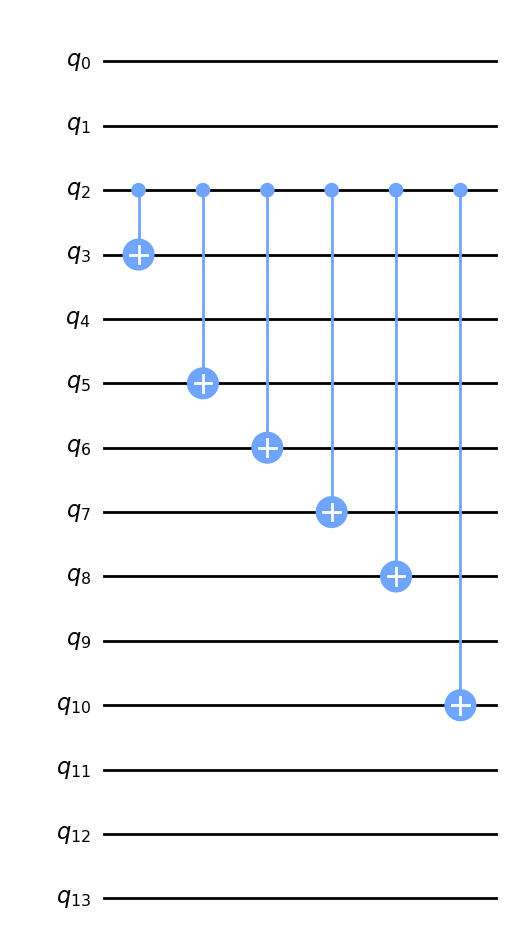

In [249]:
# Draw circuit
circ.draw('mpl')

In [250]:
print("{0:b}".format(x))

10011100010000


In [251]:
print("{0:b}".format(y))

10111100010000


In [252]:
# Step 2.1 applying NOT gate to bits from i to n that different from i bit
for w in range(i+1, n):
#     If there is not bit in the wth position of bitstrings then applying NOT gate to flip the bit 
    if getBit(x, n-w-1) == 0:
#         Adding w to array of 0 bits after ith bit
        zeroBits.append(w)
#         Adding NOT gate at wth bit
        circ.x(w)
#         Flip the bit conresponding to NOT gate in bitstring of x and y the make use in the next operations
        x = flipBit(x, n-w-1)
        y = flipBit(y, n-w-1)

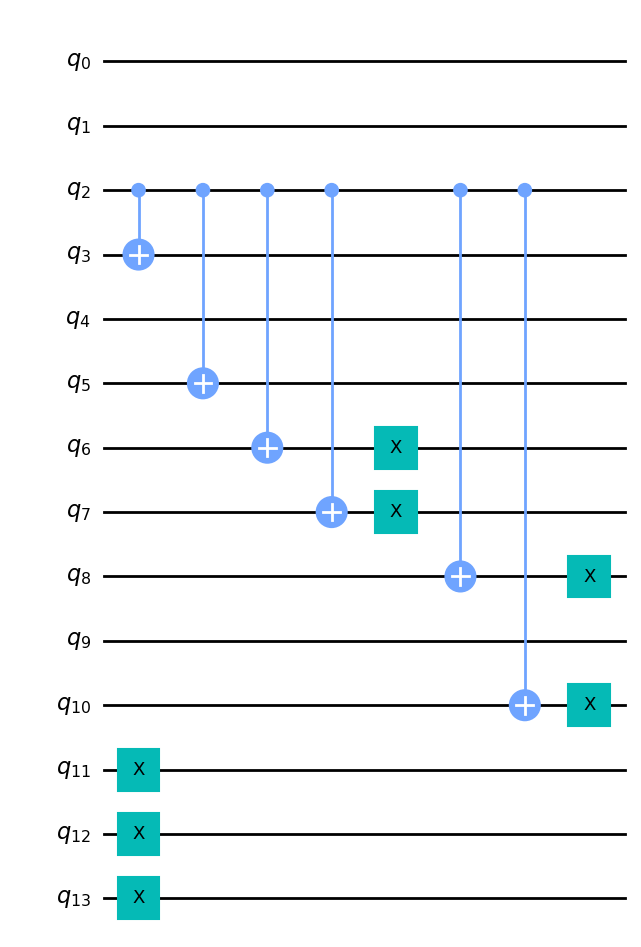

In [253]:
circ.draw('mpl')

In [254]:
print("{0:b}".format(x))

10011111111111


In [255]:
print("{0:b}".format(y))

10111111111111


In [256]:
# Create list of index in control bits
controls = []
for g in range(n):
    if g != i:
        controls.append(g)

In [257]:
# Step 2.2 applying MCX gate from control bits to i
circ.mcx(controls, i)

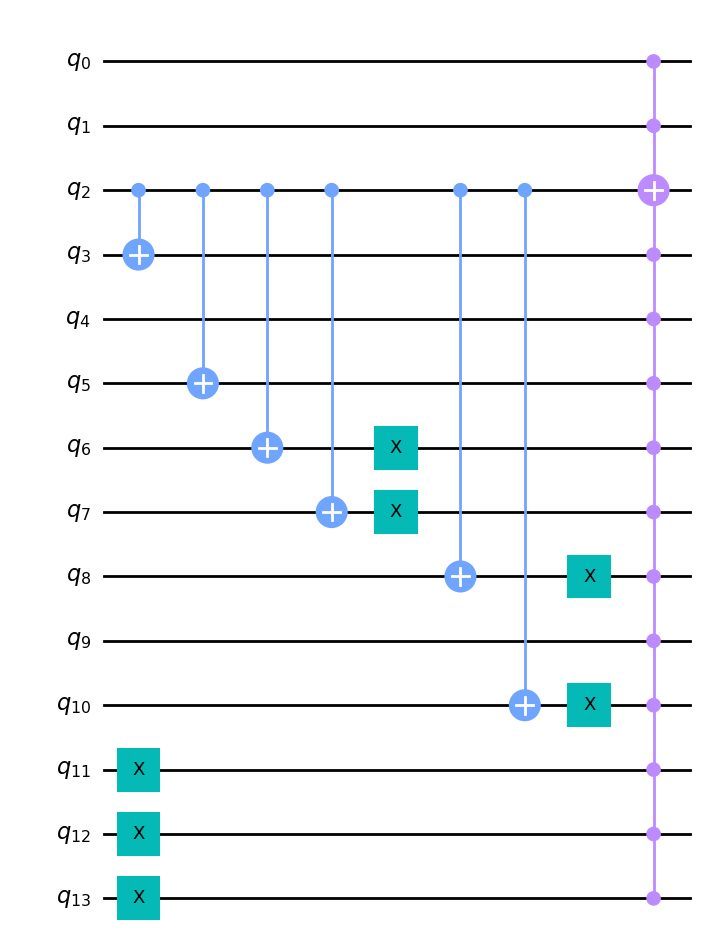

In [258]:
circ.draw('mpl')

In [259]:
# Flip the ith bit if control bits is 1
if (getBit(x, i+1) != 0):
    x = flipBit(x, n-i-1)
    y = flipBit(y, n-i-1)

In [260]:
print("{0:b}".format(x))

10111111111111


In [261]:
print("{0:b}".format(y))

10011111111111


In [262]:
# Step 3.1 repeating Step 2.1
for l in zeroBits:
    circ.x(l)
# Flip the bit conresponding to NOT gate in bitstring of x and y to make use in the next operations
    x = flipBit(x, n-l-1)
    y = flipBit(y, n-l-1)

In [263]:
print("{0:b}".format(x))

10111100010000


In [264]:
print("{0:b}".format(y))

10011100010000


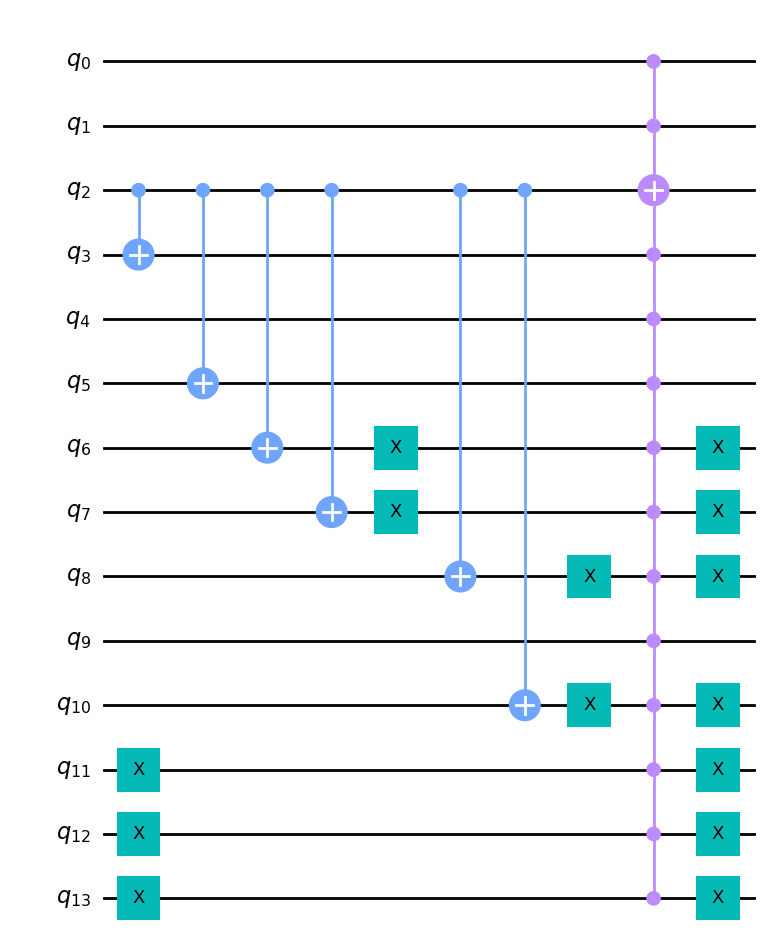

In [265]:
circ.draw('mpl')

In [266]:
# Step 3.2 repeating Step 1
for g in diffBits:
    circ.cx(i, g)
    if getBit(x, n-i-1) != 0:
        x = flipBit(x, n-g-1)
    if getBit(y, n-i-1) != 0:
        y = flipBit(y, n-g-1)
    

In [267]:
print("{0:b}".format(x))

10101011111000


In [268]:
print("{0:b}".format(y))

10011100010000


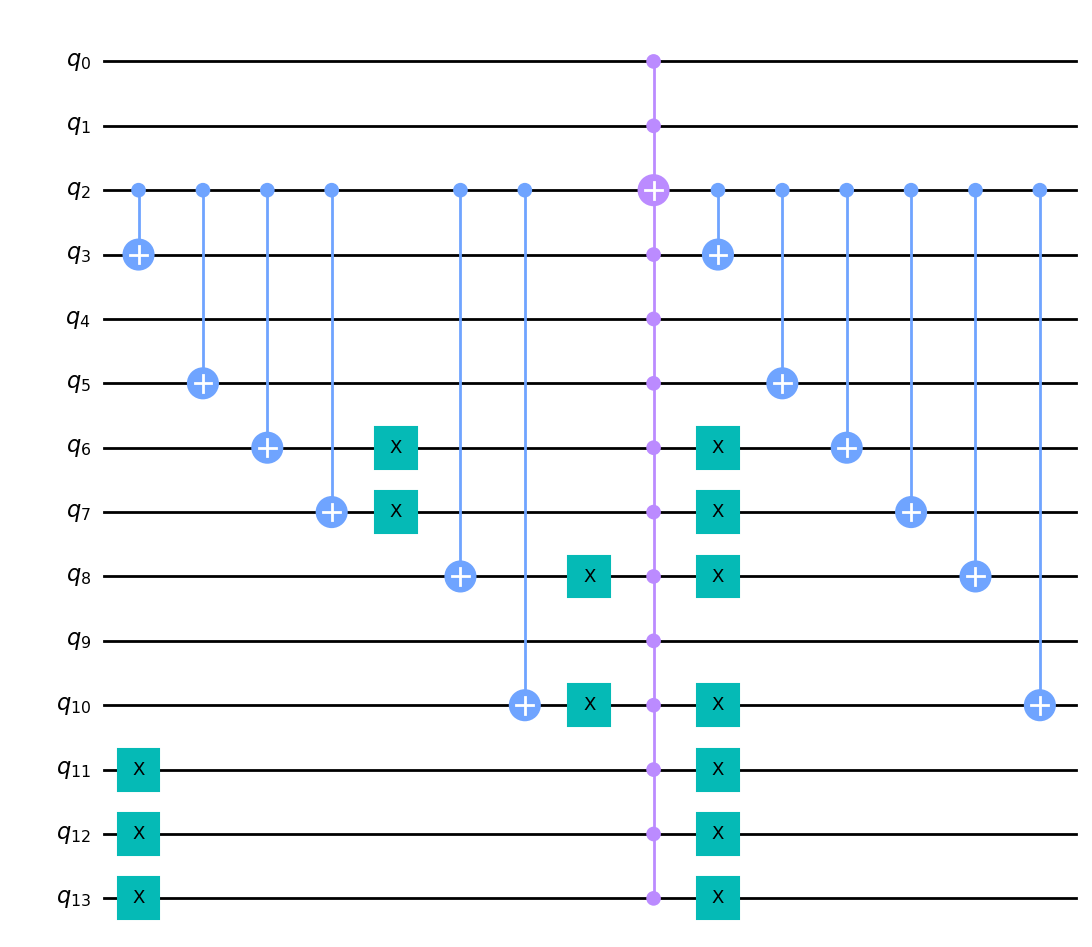

In [269]:
circ.draw('mpl')

In [270]:
print('In')
sv1.draw('latex')

In


<IPython.core.display.Latex object>

In [271]:
# Applying the circuit to the first quantum state
sv1_new = sv1.evolve(circ)
print('Out')
sv1_new.draw('latex')

Out


<IPython.core.display.Latex object>

In [272]:
print('In')
sv2.draw('latex')

In


<IPython.core.display.Latex object>

In [273]:
# Applying the circuit to the second quantum state
sv2_new = sv2.evolve(circ)
print('Out')
sv2_new.draw('latex')

Out


<IPython.core.display.Latex object>

In [274]:
# sv3 = sv3.evolve(circ)
# sv3.draw('latex')